<a href="https://colab.research.google.com/github/vinicius-mattoso/Exploratory-Data-Analysis-EDA-/blob/main/Wine_Quality/tutorial_graficos_correlacao_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

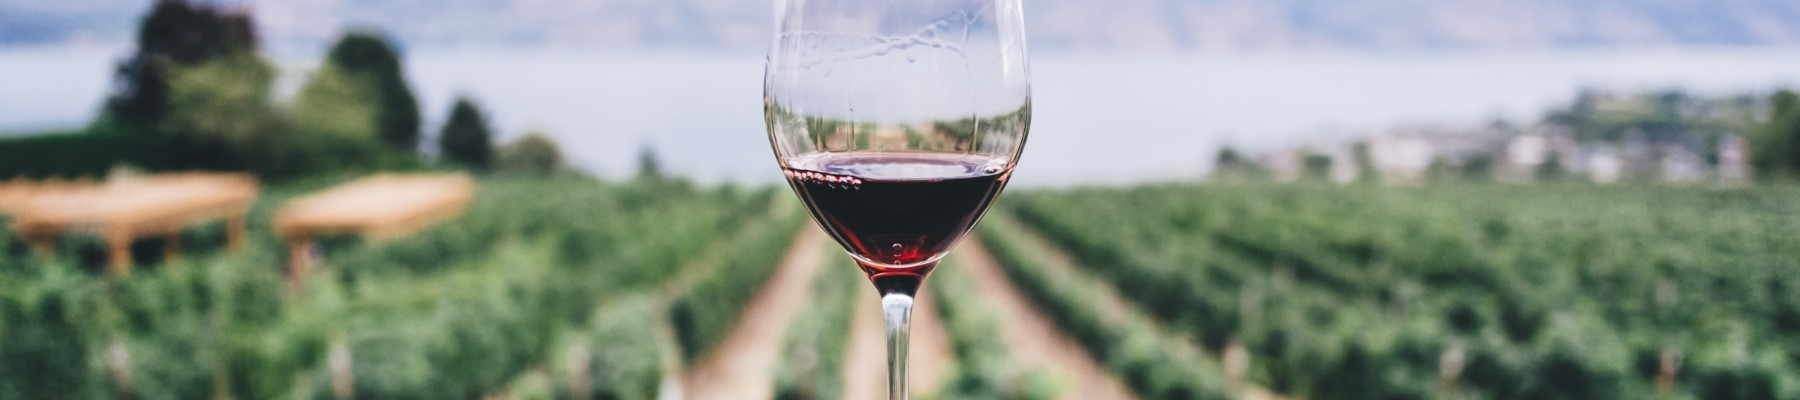

In [ ]:
#Carregando as bibliotecas

#pandas -> leitura de dados
import pandas as pd
#numpy -> operações matemáticas
import numpy as np
#matplotlib -> gráficos
import matplotlib.pyplot as plt
#seaborn -> gráficos
import seaborn as sns

In [ ]:
# Carregar a base de dados utilizada
wine_df=pd.read_csv('winequality-red.csv')
#Exibindo as 5 primeiras listas do dataset
wine_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#fazendo uma análise numérica da correlação
correlations = wine_df.corr()
correlations

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [ ]:
corr = wine_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colorma

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-0.26,0.67,0.11,0.09,-0.15,-0.11,0.67,-0.68,0.18,-0.06,0.12
volatile acidity,-0.26,1.00,-0.55,0.00,0.06,-0.01,0.08,0.02,0.23,-0.26,-0.20,-0.39
citric acid,0.67,-0.55,1.00,0.14,0.20,-0.06,0.04,0.36,-0.54,0.31,0.11,0.23
residual sugar,0.11,0.00,0.14,1.00,0.06,0.19,0.20,0.36,-0.09,0.01,0.04,0.01
chlorides,0.09,0.06,0.20,0.06,1.00,0.01,0.05,0.20,-0.27,0.37,-0.22,-0.13
free sulfur dioxide,-0.15,-0.01,-0.06,0.19,0.01,1.00,0.67,-0.02,0.07,0.05,-0.07,-0.05
total sulfur dioxide,-0.11,0.08,0.04,0.20,0.05,0.67,1.00,0.07,-0.07,0.04,-0.21,-0.19
density,0.67,0.02,0.36,0.36,0.20,-0.02,0.07,1.00,-0.34,0.15,-0.50,-0.17
pH,-0.68,0.23,-0.54,-0.09,-0.27,0.07,-0.07,-0.34,1.00,-0.20,0.21,-0.06
sulphates,0.18,-0.26,0.31,0.01,0.37,0.05,0.04,0.15,-0.20,1.00,0.09,0.25


In [ ]:
# Fill diagonal and upper half with NaNs
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
#  .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
  .background_gradient(cmap='coolwarm', axis=None)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  # Remove the CWD from sys.path while we load stuff.


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
volatile acidity,-0.26,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
citric acid,0.67,-0.55,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
residual sugar,0.11,0.00,0.14,nan,nan,nan,nan,nan,nan,nan,nan,nan
chlorides,0.09,0.06,0.20,0.06,nan,nan,nan,nan,nan,nan,nan,nan
free sulfur dioxide,-0.15,-0.01,-0.06,0.19,0.01,nan,nan,nan,nan,nan,nan,nan
total sulfur dioxide,-0.11,0.08,0.04,0.20,0.05,0.67,nan,nan,nan,nan,nan,nan
density,0.67,0.02,0.36,0.36,0.20,-0.02,0.07,nan,nan,nan,nan,nan
pH,-0.68,0.23,-0.54,-0.09,-0.27,0.07,-0.07,-0.34,nan,nan,nan,nan
sulphates,0.18,-0.26,0.31,0.01,0.37,0.05,0.04,0.15,-0.20,nan,nan,nan


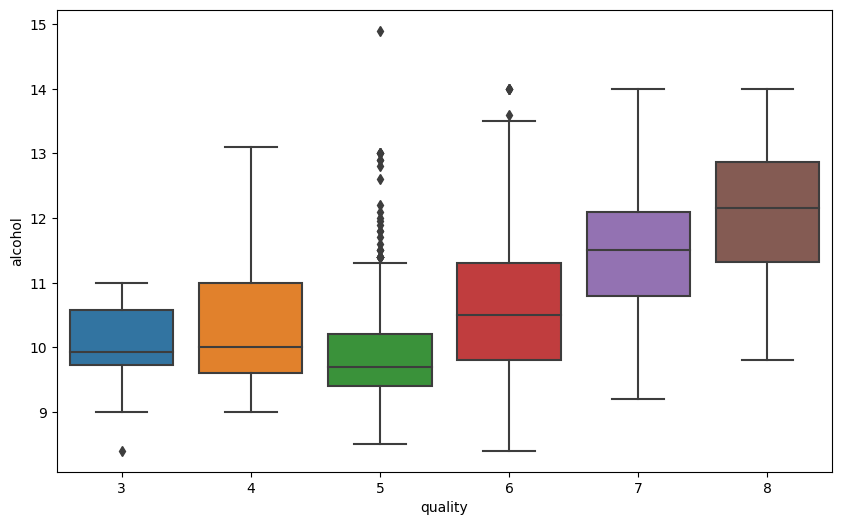

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x="quality", y="alcohol", data=wine_df)

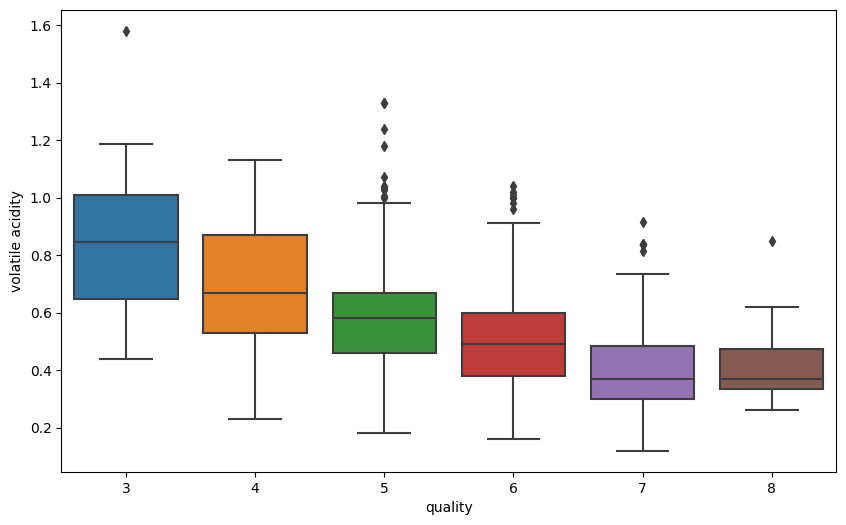

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x="quality", y="volatile acidity", data=wine_df)

Text(0, 0.5, 'Alcohol')

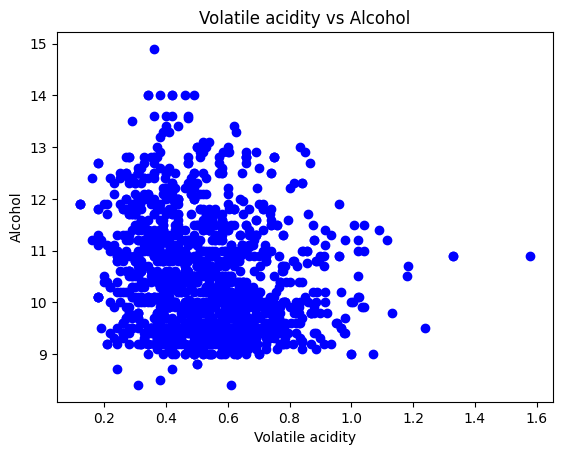

In [ ]:
plt.scatter(data=wine_df, x='volatile acidity', y='alcohol',color='blue')
plt.title('Volatile acidity vs Alcohol')
plt.xlabel('Volatile acidity')
plt.ylabel('Alcohol')


Text(0, 0.5, 'Alcohol')

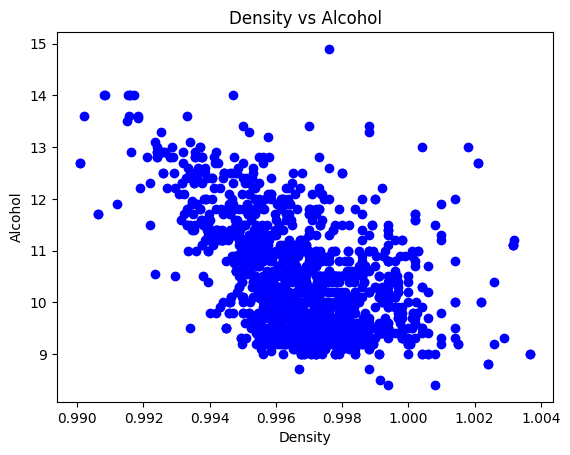

In [ ]:
# agora já temos uma noção numérica das correlações entre eles vamos a uma análise gráfica para melhorar nossa análise
# Análise mem score antes e depois
# plt.scatter(data=wine_df, x='fixed acidity', y='density')
# plt.scatter(data=wine_df, x='fixed acidity', y='pH',color='blue')
# plt.title('fixed acidity vs pH')
# plt.xlabel('fixed acidity')
# plt.ylabel('pH')

plt.scatter(data=wine_df, x='density', y='alcohol',color='blue')
plt.title('Density vs Alcohol')
plt.xlabel('Density')
plt.ylabel('Alcohol')


# x_positivo = [2.0, 10.0]
# x_negativo = [-2.0, -10.0]
# plt.plot(x_positivo, x_positivo, color='red'); #reta onde y=x

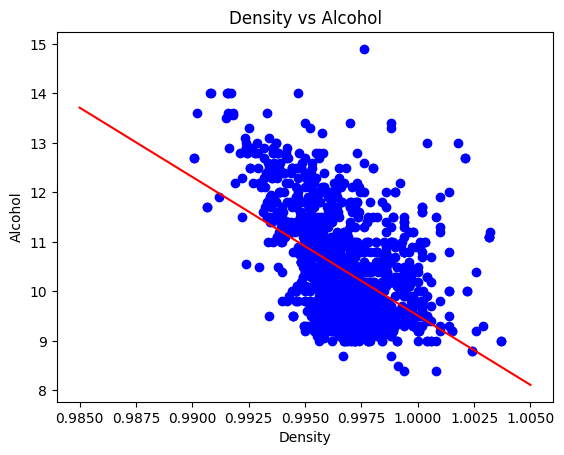

In [ ]:
plt.scatter(data=wine_df, x='density', y='alcohol',color='blue')
plt.title('Density vs Alcohol')
plt.xlabel('Density')
plt.ylabel('Alcohol')

linear_model=np.polyfit(wine_df['density'],wine_df['alcohol'],1)
linear_model_fn=np.poly1d(linear_model)
x_s= [0.985, 1.005]
plt.plot(x_s,linear_model_fn(x_s),color="red")

Text(0, 0.5, 'Citric acid')

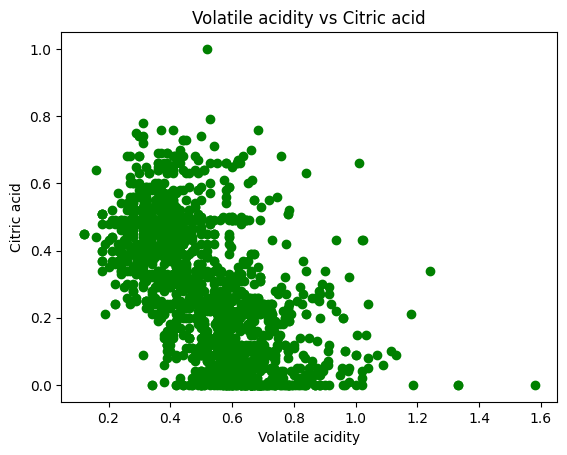

In [ ]:
plt.scatter(data=wine_df, x='volatile acidity', y='citric acid',color='green')
plt.title('Volatile acidity vs Citric acid')
plt.xlabel('Volatile acidity')
plt.ylabel('Citric acid')

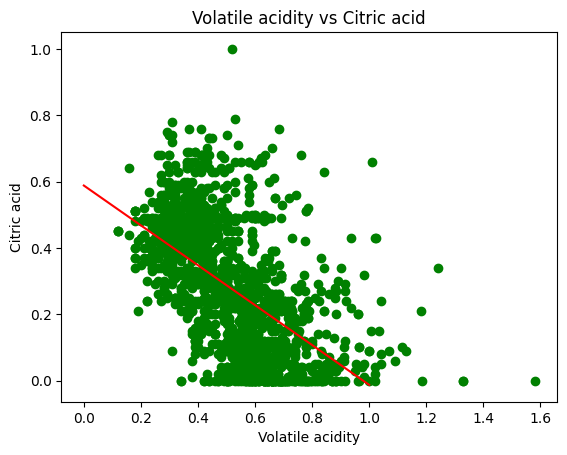

In [ ]:
plt.scatter(data=wine_df, x='volatile acidity', y='citric acid',color='green')
plt.title('Volatile acidity vs Citric acid')
plt.xlabel('Volatile acidity')
plt.ylabel('Citric acid')

linear_model=np.polyfit(wine_df['volatile acidity'],wine_df['citric acid'],1)
linear_model_fn=np.poly1d(linear_model)
x_s=[0, 1.0]
plt.plot(x_s,linear_model_fn(x_s),color="red")

In [ ]:
#vamos fazer agora uma análise da influencia dos parametros para cada qualidade de vinho

#pegando as diferentes qualidades de vinho

qualidades=wine_df['quality'].unique()
qualidades

array([5, 6, 7, 4, 8, 3])

In [ ]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#criando os novos dataframes
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# inicialização do contador
i=0
for quality in qualidades:
  qualidade=qualidades[i]
  exec("df_wine_quality{}=wine_df.loc[wine_df['quality']==qualidade]".format(quality))
  i=i+1

In [ ]:
df_wine_quality3.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
832,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3


Text(0, 0.5, 'Alcohol')

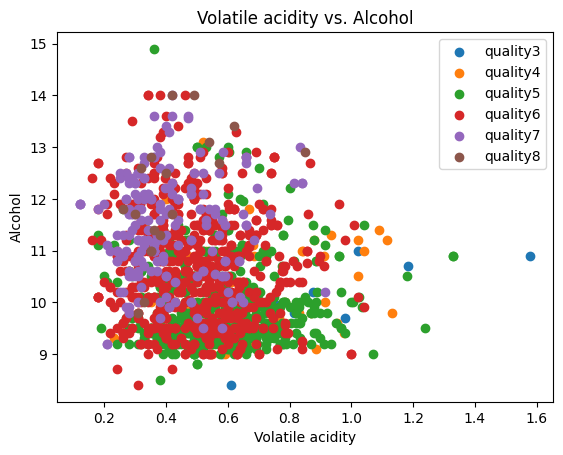

In [ ]:
plt.scatter(data=df_wine_quality3, x='volatile acidity', y='alcohol', label='quality3')
plt.scatter(data=df_wine_quality4, x='volatile acidity', y='alcohol', label='quality4')
plt.scatter(data=df_wine_quality5, x='volatile acidity', y='alcohol', label='quality5')
plt.scatter(data=df_wine_quality6, x='volatile acidity', y='alcohol', label='quality6')
plt.scatter(data=df_wine_quality7, x='volatile acidity', y='alcohol', label='quality7')
plt.scatter(data=df_wine_quality8, x='volatile acidity', y='alcohol', label='quality8')

plt.legend()
plt.title('Volatile acidity vs. Alcohol')
plt.xlabel('Volatile acidity')
plt.ylabel('Alcohol')

Text(0, 0.5, 'Alcohol')

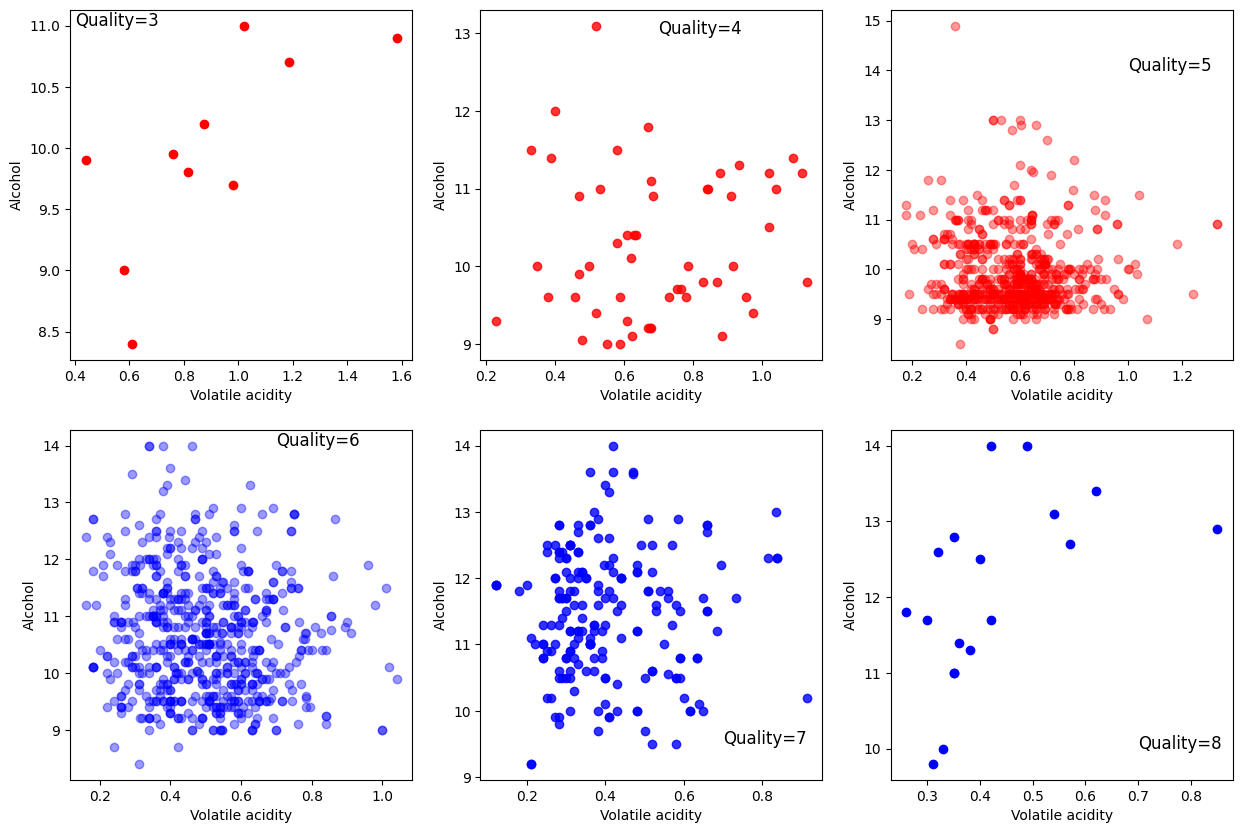

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
ax[0, 0].scatter(x = df_wine_quality3['volatile acidity'], y = df_wine_quality3['alcohol'],color='red', alpha=1.0)
text='Quality=3'
xy=(0.4,11.0)
ax[0, 0].annotate(text, xy,fontsize=12)
ax[0, 0].set_xlabel("Volatile acidity")
ax[0, 0].set_ylabel("Alcohol")

ax[0,1].scatter(x = df_wine_quality4['volatile acidity'], y = df_wine_quality4['alcohol'],color='red', alpha=0.8)
text='Quality=4'
xy=(0.7,13.0)
ax[0, 1].annotate(text, xy,fontsize=12)
ax[0,1].set_xlabel("Volatile acidity")
ax[0,1].set_ylabel("Alcohol")

ax[0,2].scatter(x = df_wine_quality5['volatile acidity'], y = df_wine_quality5['alcohol'],color='red', alpha=0.4)
text='Quality=5'
xy=(1.0,14.0)
ax[0, 2].annotate(text, xy,fontsize=12)
ax[0,2].set_xlabel("Volatile acidity")
ax[0,2].set_ylabel("Alcohol")

ax[1, 0].scatter(x = df_wine_quality6['volatile acidity'], y = df_wine_quality6['alcohol'],color='blue', alpha=0.4)
text='Quality=6'
xy=(0.7,14.0)
ax[1, 0].annotate(text, xy,fontsize=12)
ax[1, 0].set_xlabel("Volatile acidity")
ax[1, 0].set_ylabel("Alcohol")

ax[1, 1].scatter(x = df_wine_quality7['volatile acidity'], y = df_wine_quality7['alcohol'],color='blue', alpha=0.8)
text='Quality=7'
xy=(0.7,9.5)
ax[1, 1].annotate(text, xy,fontsize=12)
ax[1, 1].set_xlabel("Volatile acidity")
ax[1, 1].set_ylabel("Alcohol")

ax[1, 2].scatter(x = df_wine_quality8['volatile acidity'], y = df_wine_quality8['alcohol'],color='blue', alpha=1.0)
text='Quality=8'
xy=(0.7,10.0)
ax[1, 2].annotate(text, xy,fontsize=12)
ax[1, 2].set_xlabel("Volatile acidity")
ax[1, 2].set_ylabel("Alcohol")



Text(0, 0.5, 'Volatile acidity')

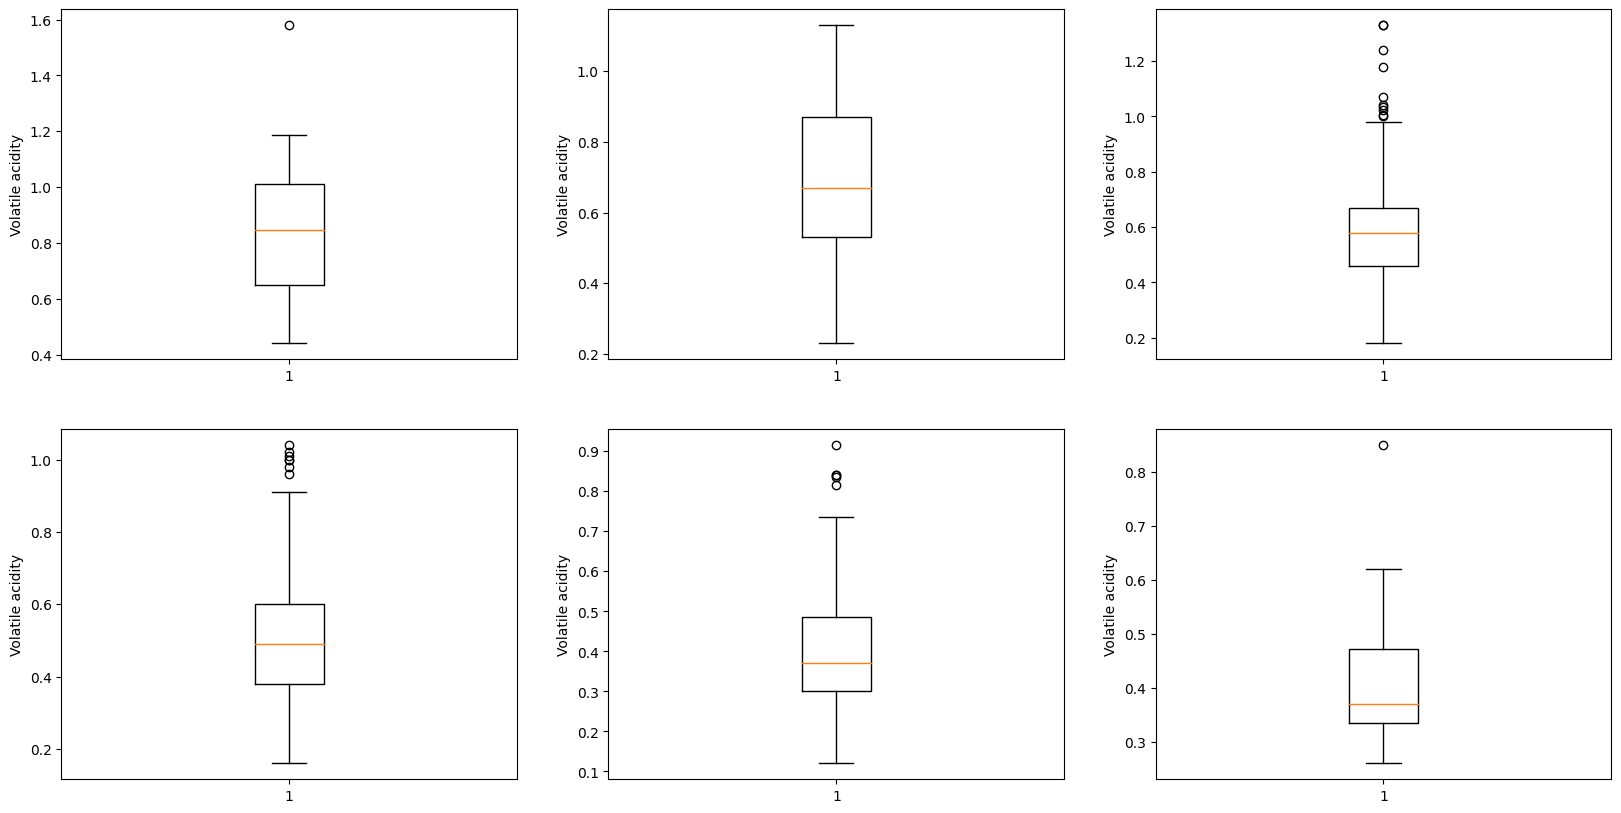

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
ax[0, 0].boxplot(df_wine_quality3['volatile acidity'])
text='Quality=3'
# xy=(0.4,11.0)
# ax[0, 0].annotate(text, xy,fontsize=12)
ax[0, 0].set_ylabel("Volatile acidity")
ax[0, 0].set_xlabel(None)

ax[0,1].boxplot(df_wine_quality4['volatile acidity'])
text='Quality=4'
# xy=(0.7,13.0)
# ax[0, 1].annotate(text, xy,fontsize=12)
ax[0,1].set_ylabel("Volatile acidity")
# ax[0,1].set_ylabel("Alcohol")

ax[0,2].boxplot(df_wine_quality5['volatile acidity'])
text='Quality=5'
# xy=(1.0,14.0)
# ax[0, 2].annotate(text, xy,fontsize=12)
ax[0,2].set_ylabel("Volatile acidity")
# ax[0,2].set_ylabel("Alcohol")

ax[1, 0].boxplot(df_wine_quality6['volatile acidity'])
text='Quality=6'
# xy=(0.7,14.0)
# ax[1, 0].annotate(text, xy,fontsize=12)
ax[1, 0].set_ylabel("Volatile acidity")
# ax[1, 0].set_ylabel("Alcohol")

ax[1, 1].boxplot(df_wine_quality7['volatile acidity'])
text='Quality=7'
# xy=(0.7,9.5)
# ax[1, 1].annotate(text, xy,fontsize=12)
ax[1, 1].set_ylabel("Volatile acidity")
# ax[1, 1].set_ylabel("Alcohol")

ax[1, 2].boxplot(df_wine_quality8['volatile acidity'])
text='Quality=8'
# xy=(0.7,10.0)
# ax[1, 2].annotate(text, xy,fontsize=12)
ax[1, 2].set_ylabel("Volatile acidity")
# ax[1, 2].set_ylabel("Alcohol")

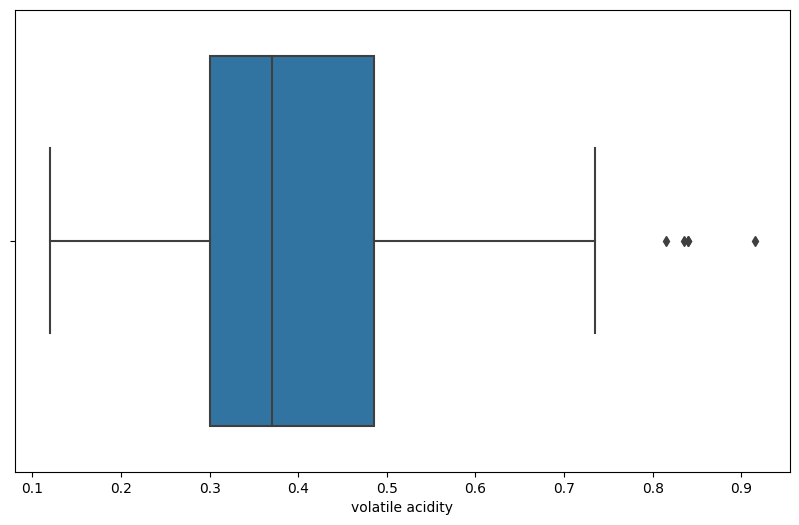

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x="volatile acidity", data=df_wine_quality7)